This tutorial uses data pulled from [this kaggle repository](https://www.kaggle.com/rohankayan/years-of-experience-and-salary-dataset?select=Salary_Data.csv).

# Simple Linear Regression

[Linear regression](https://en.wikipedia.org/wiki/Linear_regression) is a simple algorithm by which we, put simply, can test using a simple line how good of a predictor the values of one continuous variable are to the vales of another. This one uses the simple formula:

$$y=mx+b$$

There's just one coefficient here - `mx`. That's the __slope__. Then there's the __intercept__ term `b`, which moves the line up and down on the graph. We can use these two to fit a simple straight line to a bunch points on a graph. 

## Imports and load data

In [38]:
#pandas is a python library which is primarily for data manipulation and analysis
import pandas as pd
#numpy is a python library built for working with multidimension arrays and matrices.
#here our data is a 2-dimensional matrix, so numpy makes working with it easier.
import numpy as np
#matplotlib is a data visualization library. Here we're going to use it to make plots. 
import matplotlib.pyplot as plt
#seaborn makes matplotlib pretty.
import seaborn as sns
#sklearn is the library we're going to be using to actually perform the regression analysis. 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#this gets the plots ready. 
sns.set()
%matplotlib inline

After we __import__ all of the libraries we need, we are going to __load the dataset.__

In this case, we have a dataset called __SalaryData.csv__ which contains, well, salary data. It's being loaded as a __csv__ which is "comma-separated values". The dataset is included in the sidebar to the left, so you can open it and check out the data inside. It contains __salaries__ combined with __years of experience__. These are the two values for which we're going to look for a relationship. 

We're loading this as a __data frame__, which is a special two-dimensional matrix - basically a table - which the __pandas__ library uses in analysis. 

In [39]:
df = pd.read_csv("./SalaryData.csv")

Now we're going to use the __head()__ function, which outputs the first few entries of the dataset. This just gives us an idea of what our data looks like without having to go through the trouble of opening the whole thing.

In [40]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


We'll also check the __shape__ of the dataset, which will tell us how many rows and columns there are, respectively. If you press this button you should see $(30,2)$, which corresponds with a dataset with 30 rows and 2 columns. So our IV and DV both have an _n_ - sample size - of 30.

In [41]:
df.shape

(30, 2)

Before we go forward, let's see if there are any missing values in our dataset. We will be compounding a few functions for this purpose. 

So, we have a _30 x 2_ data frame. We'll call this dataframe with the name we assigned it - __df__ - then use the __.isnull()__ command to return a data frame of the same size, but made up of cells that contain either _true_ or _false_. _True_ if there is no value in a given cell, _false_ if there's something there. Then we tell python we're going to perform an action on all of those cells using __.values__, and then use __.any()__ to see if _any_ of those cells returned _true_. This line will return _true_ if there's _any true value_ in the dataframe, and _False_ if there are none. 

Here, this should return _False_ since there are, ostensibly, no missing values in our data frame.

In [42]:
df.isnull().values.any()

False

## Split data

So, one of the cool things about python is its use of a data type called a __tuple__. This is a set of variables, kind of like an array, that you can push together as one single object when writing out your functions. Here, we're calling a function called `train_test_split` from the `scikit-learn` library to split out data into our _dependent variable_ (`Salary`) and our _independent variable_ (`YearsExperience`). 

What we're doing here is a little different from the kind of regression that you might do with a simple _glm()_ command in R or a linear regression command in SPSS, because we're going to be splitting the data into a test set and a train set. This is because we're not building a model here for __hypothesis testing__ but instead for __prediction__ of future values. Here, a _causal relationship_ is less important to us than the simple _predictive power of our independent variable on different values of our dependent variable_. So, we want to prevent __overfitting__ our model to the data we have, which may serve to make our model less able to predict future values. This also helps when we're trying to train our model with only a few hundred data points to try to predict the values of thousands or even millions of data points.

As was mentioned earlier, we're going to use the `train_test_split` method from `scikit-learn` to split the data we collected into a _training set_ and a _testing set_. we enter a number between 0 and 1 to the `test_size` parameter to tell the function what proportion of the data to use to test the model we formed. We'll define `random_state` as $24$, which will always produce the same __"random seed"__ to initialize our model.

In [43]:
training_set, testing_set = train_test_split(df, test_size=0.3, random_state=21)

Now, let's make a __copy__ of our training set. This will give us more leeway to alter and utilize our training set, because we'll have a _backup_ from which to get our data back. We'll use the copy to perform most of the analysis.

In [44]:
df_copy = training_set.copy()

## Data Summary

Let's take a look at our data. First we're going to get a __summary__ of each of our variables using the `describe` function from __pandas__. Of note here is the __std__ or __standard deviation__, the __mean__  and the __quartiles__. 

In [45]:
df_copy.describe()

,YearsExperience,Salary
count,21.000000,21.000000
mean,4.900000,70497.380952
std,2.661203,25543.995362
min,1.100000,37731.000000
25%,3.200000,56957.000000
50%,4.100000,63218.000000
75%,5.900000,83088.000000
max,10.500000,121872.000000


Now we're going to use the `corr` method. This will output a __correlation matrix__ between the variables in our dataset, which will tell us whether one is a good predictor of another.


In [46]:
df_copy.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.980014
Salary,0.980014,1.000000


### Plotting

Let's use `matplotlib`'s `plot` method to get a __scatter plot__ of the data. This will give us a __visual cue__ of what relationship the two variables have. You can use this with the correlation numbers to get a good preliminary idea of whether linear regression is going to be a good model for your variables. I made it teal!

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

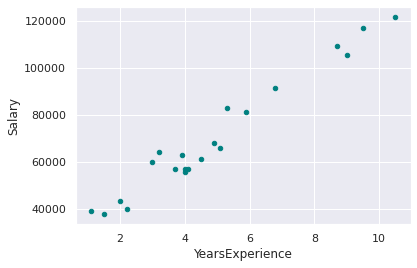

In [47]:
df_copy.plot.scatter(x='YearsExperience', y='Salary', c='teal')

Also using `seaborn`'s `regplot` to get a visual cue regarding your regression model. *NOTE THIS IS NOT YOUR FINAL REGRESSION MODEL, JUST A GUESS AS TO WHAT IT MIGHT LOOK LIKE*.

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

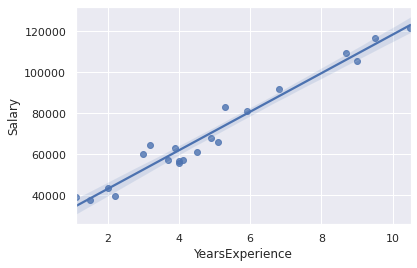

In [48]:
sns.regplot(x='YearsExperience', # Independent Variable (x-axis)
           y='Salary', # Dependent Variable (y-axis)
           data=df_copy)

## Making our Model

So now we're going to make three new sets for our analysis. first we're going to make `training_labels`. This is just the `Salary` column from the dataframe. It'll be used to provide correct answers to the the `LinearRegression` model's guesses while it's training.

In [49]:
training_labels = training_set["Salary"]

 `testing_set` is pretty much just the `YearsExperience` column. It's the data our model will be making guesses from.

In [50]:
testing_set_full = testing_set.copy()

testing_set = testing_set.drop(["Salary"], axis=1)

`training_set` that is also just the `YearsExperience` column. The model will take these values and build a guessing model based on corresponding `Salary` values.

In [51]:
training_set_full = training_set.copy()

training_set = training_set.drop(["Salary"], axis=1)

Alright! Now we're finally ready to actually run the __linear regression__ function. First we're going to initialize the regression and assign it a name (here we're calling it `regression`). Then we'll __fit__ it with the `training_set` and the corresponding `training_labels`. We'll pass both of these into the `fit` method.

In [52]:
regression = LinearRegression().fit(training_set, training_labels)

Now we can call a function to make predictions on our `testing_set`. Remember that because of the way we set up our model it has not seen any of this data before this point. This means the predictions it makes on this portion of the dataset will help us determine how well it fits actual data.

In [53]:
salary_pred = regression.predict(testing_set)

print(str(salary_pred).strip("[]"))

 51683.73508963 101539.89662592  98717.84974651 121294.22478181
  36632.81839943  91192.39140141  80844.88617689  54505.78196904
 114709.44872984


## Analyze Results

Let's pull the __coefficient__ ($m$) and the __intercept__ ($b$) from our model. There's only one of each because we are doing a __univariate regression__.

In [62]:
print("Coefficient: ", regression.coef_[0])
print("Intercept: ", regression.intercept_)

Coefficient:  9406.82293137532
Intercept:  24403.948588641877


### Predictions vs Values
Now that we have our $m$ coefficient and $b$ intercept, let's go ahead and build our model. The above output should put out numbers that make the equation:

$y =  9628.315737792072x + 23784.1481416179$

Let's see if that works with our __testing set__:

In [55]:
testing_set_print = testing_set_full.reset_index()
print("Testing Set Summary:")
print(" vals" + 11*" " + "Pred" + 12*" " + "Actual")
for idx in range(len(testing_set_full)):
    print("{:<4} => | {:<18} | {:<10}".format(testing_set_print["YearsExperience"][idx],salary_pred[idx], testing_set_print["Salary"][idx]))

Testing Set Summary:
 vals           Pred            Actual
2.9  => | 51683.7350896303   | 56642.0   
8.2  => | 101539.8966259195  | 113812.0  
7.9  => | 98717.8497465069   | 101302.0  
10.3 => | 121294.22478180769 | 122391.0  
1.3  => | 36632.818399429794 | 46205.0   
7.1  => | 91192.39140140664  | 98273.0   
6.0  => | 80844.88617689381  | 93940.0   
3.2  => | 54505.7819690429   | 54445.0   
9.6  => | 114709.44872984494 | 112635.0  


## Model Accuracy
We're going to use the `score` method from our `scikit-learn` library to measure the $R^2$ of our model. This number tells us _how much of the overall variation (__variance__) in the measurements we made can be explained by the __regression equation__ our model made_. The closer to $1$ this estimate is, the more _"accurate"_ of a prediction our model is making.

In [56]:
score = regression.score(testing_set, testing_set_full["Salary"])
print("R squared = {}".format(score))
print("Approximately {:.1f}% of variance is explained by our model.".format(score*100))

R squared = 0.9244145228524281
Approximately 92.4% of variance is explained by our model.


We can also plot our __test data__ (here in dark blue) and our __training data__ (here in teal) as a __scatter plot__ and show visually how our prediction is performing. The __regression line__ based on our predictions is here shown in red.

Here we're asking __matplotlib__ (which we called _"plt"_ in the import cell) to layer together:
- two __scatter plots__ with the __test__ and __train__ datasets
- one __plot line__ mapping the __regression predictions__
- one __legend__ describing the __plot contents__

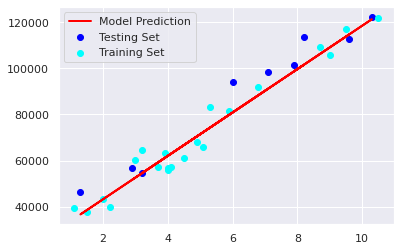

In [57]:
plt.scatter(testing_set_full["YearsExperience"], testing_set_full["Salary"], color='blue')
plt.scatter(training_set_full["YearsExperience"], training_set_full["Salary"], color='aqua')
plt.plot(testing_set_full["YearsExperience"], salary_pred, color='red', linewidth=2)
plt.legend(labels=["Model Prediction", "Testing Set", "Training Set"])

## Conclusion

This notebook covered how to train and evaluate a simple __regression analysis__ in __python__ using __sklearn tools__. The focus of this was geared towards those wanting to implement these analyses for __machine learning__ and __data science__ purposes, as opposed to a more __causal-relationship__ or __research__ based analysis. 

In the end here, I think it might be prudent to briefly cover how a regression might be performed in python using a more _traditional_ method, like you might find if you put this data into the software I first learned when I was starting out in stats - __IBM SPSS__. 

So, we're going to import one more library to perform this task: `statsmodels.api`. This library is built for the more traditional __research-oriented__ analysis we are looking for. Let's get started!

In [58]:
import statsmodels.api as sm

Now, we're going to use the `statsmodels` `OLS()` function to build an __Ordinary Least Squares__ regression model from our data. It's important to note that this model will use __100%__ of our data, without concerning itself with __overfitting__ the data. It's just trying to find the line that best fits the variation of the current data. We're going to put `df_copy` into this and `fit()` the OLS model to the data. The `OLS()` method here is taking in two parameters: first the __Y__, then the __X__

In [59]:
model = sm.OLS(df_copy['Salary'],df_copy['YearsExperience']).fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              700.5
Date:                Thu, 26 Nov 2020   Prob (F-statistic):                    4.85e-17
Time:                        02:18:02   Log-Likelihood:                         -227.83
No. Observations:                  21   AIC:                                      457.7
Df Residuals:                      20   BIC:                                      458.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  1.329e+04    502.315     26.467      0.000    1.22e+04    1.43e+04
==============================================================================
Omnibus:                        0.272   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.873   Jarque-Bera (JB):                0.440
Skew:                          -0.186   Prob(JB):                        0.802
Kurtosis:                       2.396   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Final Regression Plot
Now we've got a regression __output__ with some descriptions you might be more familiar. You can switch between these two depending on what your analysis needs are. Let's finish up with one more __plot__. In fact, you've seen this plot before. 

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

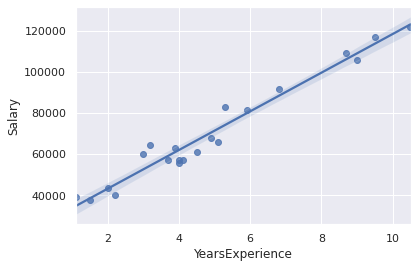

In [60]:
sns.regplot(x='YearsExperience', # Independent Variable (x-axis)
           y='Salary', # Dependent Variable (y-axis)
           data=df_copy)